In [1]:
from study_help import load_studies
from study_visualize import *
from study import Study, Referral
import pandas as pd
from pathlib import Path

c:\Users\florence.boettger\Documents\GitHub\visual-counterfactuals\study_analysis\study_visualize.py:150: SyntaxWarning: invalid escape sequence '\S'
  def count_answers(study: Study, query: str = "\S"):
c:\Users\florence.boettger\Documents\GitHub\visual-counterfactuals\study_analysis\study_visualize.py:163: SyntaxWarning: invalid escape sequence '\S'
  def count_mental_models(study: Study, query: str = "\S"):


In [2]:
studies = load_studies(Path.cwd().parent / 'study_data')

In [3]:
for s in studies:
    s.print_explanations()

Study 251570_ours
Response #1
Familiarity: 2
Question 1: Correct: -1; Answer: 1, dark wings
Question 2: Correct: -1; Answer: -0.3333333333333333, unclear if wings are dark or not
Question 3: Correct: -1; Answer: 1, 
Question 4: Correct: 1; Answer: -1, 
Question 5: Correct: 1; Answer: -1, 
Question 6: Correct: -1; Answer: 1, 
Question 7: Correct: -1; Answer: 1, 
Question 8: Correct: 1; Answer: -1, 
Question 9: Correct: 1; Answer: -1, 
Question 10: Correct: 1; Answer: -1, 
Average accuracy: 0.1
Mental Model: color of wings is the easiest feature for distinguishing them
Response #2
Familiarity: 2
Question 1: Correct: -1; Answer: -0.3333333333333333, 
Question 2: Correct: -1; Answer: -0.3333333333333333, 
Question 3: Correct: -1; Answer: -0.3333333333333333, 
Question 4: Correct: 1; Answer: 0.3333333333333333, 
Question 5: Correct: 1; Answer: -0.3333333333333333, 
Question 6: Correct: -1; Answer: -0.3333333333333333, 
Question 7: Correct: -1; Answer: -0.3333333333333333, 
Question 8: Corre

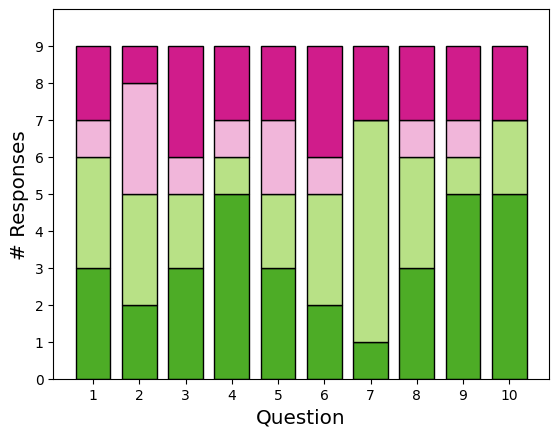

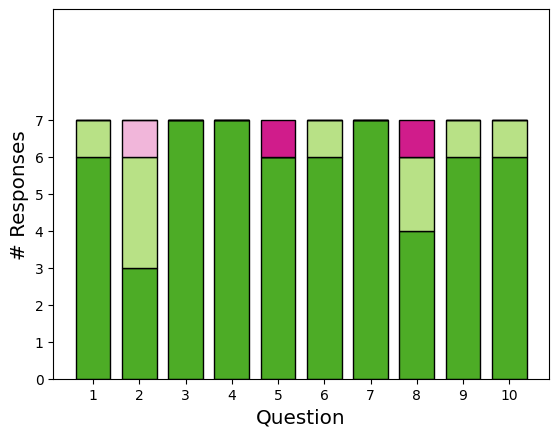

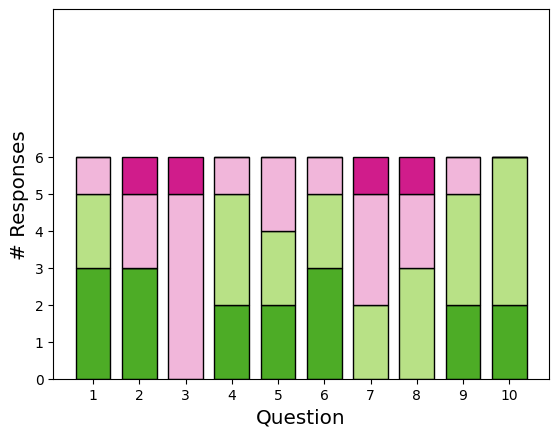

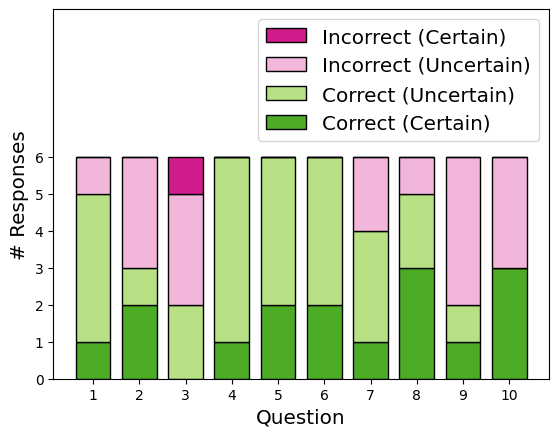

In [4]:
max_count = max([len(s.responses) for s in studies])
for i, s in enumerate(studies):
    visualize_accuracy(s, max_count=max_count+0.5, legend="upper right" if i == 3 else None)

In [5]:
for s in studies:
    count_answers(s)
    count_answers(s, "(wing|mantle|feather)+")
    count_answers(s, "(wing|color|colour)+")  
    count_answers(s, "(wing|color|colour|feather)+")
    count_answers(s, "brown")
    count_mental_models(s, "brown+")

Study 251570_ours has 8 matches for query \S.
Study 251570_ours has 8 matches for query (wing|mantle|feather)+.
Study 251570_ours has 7 matches for query (wing|color|colour)+.
Study 251570_ours has 8 matches for query (wing|color|colour|feather)+.
Study 251570_ours has 2 matches for query brown.
Study 251570_ours has 2 matches in the mental models for query brown+.
Study 251570_vandenhende has 6 matches for query \S.
Study 251570_vandenhende has 6 matches for query (wing|mantle|feather)+.
Study 251570_vandenhende has 5 matches for query (wing|color|colour)+.
Study 251570_vandenhende has 6 matches for query (wing|color|colour|feather)+.
Study 251570_vandenhende has 1 matches for query brown.
Study 251570_vandenhende has 1 matches in the mental models for query brown+.
Study 433137_ours has 6 matches for query \S.
Study 433137_ours has 5 matches for query (wing|mantle|feather)+.
Study 433137_ours has 2 matches for query (wing|color|colour)+.
Study 433137_ours has 5 matches for query (win

In [6]:
for s in studies:
    print(s.name)
    compare_answers(s.responses)

251570_ours
color appeared 6 time(s).
wing appeared 6 time(s).
white appeared 6 time(s).
feather appeared 4 time(s).
bird appeared 4 time(s).
are appeared 3 time(s).
alpha appeared 3 time(s).
beta appeared 3 time(s).
dark appeared 2 time(s).
them appeared 2 time(s).
gray appeared 2 time(s).
brown appeared 2 time(s).
with appeared 2 time(s).
one appeared 2 time(s).
all appeared 2 time(s).
bill appeared 2 time(s).
251570_vandenhende
wing appeared 5 time(s).
white appeared 4 time(s).
all appeared 4 time(s).
gray appeared 4 time(s).
alpha appeared 3 time(s).
color appeared 3 time(s).
beta appeared 3 time(s).
bill appeared 3 time(s).
not appeared 3 time(s).
with appeared 3 time(s).
feathers appeared 2 time(s).
brow appeared 2 time(s).
bird appeared 2 time(s).
more appeared 2 time(s).
were appeared 2 time(s).
there appeared 2 time(s).
when appeared 2 time(s).
ivory appeared 2 time(s).
gull appeared 2 time(s).
different appeared 2 time(s).
are appeared 2 time(s).
has appeared 2 time(s).
fulma

Study 251570_ours received 9 responses.
Study 251570_vandenhende received 7 responses.
Study 433137_ours received 6 responses.
Study 433137_vandenhende received 6 responses.
Total responses received: 28
{'Institute': array([9., 6., 1., 0., 0.]), 'Bird Forums': array([0., 2., 1., 4., 2.]), 'Other': array([1., 1., 1., 0., 0.])}


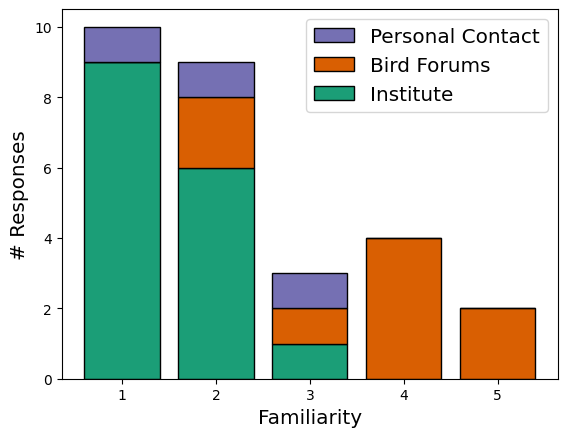

In [7]:
visualize_familiarity_count(studies)

In [8]:
for s in studies:
    print(f"Average familiarity for study {s.name}: {np.average([r.familiarity for r in s.responses])}")
    print(f"Fraction of certain answers for {s.name}: {np.count_nonzero([[abs(a) == 1 for a in r.main_testing] for r in s.responses]) / np.count_nonzero([[a for a in r.main_testing] for r in s.responses])}")

Average familiarity for study 251570_ours: 2.4444444444444446
Fraction of certain answers for 251570_ours: 0.5888888888888889
Average familiarity for study 251570_vandenhende: 2.7142857142857144
Fraction of certain answers for 251570_vandenhende: 0.8571428571428571
Average familiarity for study 433137_ours: 1.6666666666666667
Fraction of certain answers for 433137_ours: 0.35
Average familiarity for study 433137_vandenhende: 2.0
Fraction of certain answers for 433137_vandenhende: 0.2833333333333333


In [9]:
for s in studies:
    s.evaluate()

Response 0 of study 251570_ours has an accuracy of 0.1
Response 1 of study 251570_ours has an accuracy of 0.9
Response 2 of study 251570_ours has an accuracy of 0.6
Response 3 of study 251570_ours has an accuracy of 1.0
Response 4 of study 251570_ours has an accuracy of 0.1
Response 5 of study 251570_ours has an accuracy of 1.0
Response 6 of study 251570_ours has an accuracy of 0.3
Response 7 of study 251570_ours has an accuracy of 0.9
Response 8 of study 251570_ours has an accuracy of 0.9
Average accuracy for study 251570_ours is 0.6444444444444445
Response 0 of study 251570_vandenhende has an accuracy of 1.0
Response 1 of study 251570_vandenhende has an accuracy of 1.0
Response 2 of study 251570_vandenhende has an accuracy of 1.0
Response 3 of study 251570_vandenhende has an accuracy of 1.0
Response 4 of study 251570_vandenhende has an accuracy of 0.9
Response 5 of study 251570_vandenhende has an accuracy of 0.9
Response 6 of study 251570_vandenhende has an accuracy of 0.9
Average ac

In [10]:
Study(studies[0].truth, "combined_ours", np.array([r for s in [studies[0], studies[2]] for r in s.responses]).flatten()).evaluate()
Study(studies[0].truth, "combined_existing", np.array([r for s in [studies[1], studies[3]] for r in s.responses]).flatten()).evaluate()

Response 0 of study combined_ours has an accuracy of 0.1
Response 1 of study combined_ours has an accuracy of 0.9
Response 2 of study combined_ours has an accuracy of 0.6
Response 3 of study combined_ours has an accuracy of 1.0
Response 4 of study combined_ours has an accuracy of 0.1
Response 5 of study combined_ours has an accuracy of 1.0
Response 6 of study combined_ours has an accuracy of 0.3
Response 7 of study combined_ours has an accuracy of 0.9
Response 8 of study combined_ours has an accuracy of 0.9
Response 9 of study combined_ours has an accuracy of 0.3
Response 10 of study combined_ours has an accuracy of 0.8
Response 11 of study combined_ours has an accuracy of 0.8
Response 12 of study combined_ours has an accuracy of 0.4
Response 13 of study combined_ours has an accuracy of 0.7
Response 14 of study combined_ours has an accuracy of 0.8
Average accuracy for study combined_ours is 0.64
Response 0 of study combined_existing has an accuracy of 1.0
Response 1 of study combined_e

In [11]:
all_responses = [r for s in studies for r in s.responses]
print(f"Average age overall: {np.mean([r.age for r in all_responses])}")
responses_by_ref = {}
for ref in Referral:
    responses_by_ref[ref] = [r for r in all_responses if r.referral_type == ref]
    if len(responses_by_ref[ref]) > 0:
        avg_age = np.mean([r.age for r in responses_by_ref[ref]])
        print(f"Avg. Age for referral {ref.value}: {avg_age}")
        location_dict = {}
        for r in responses_by_ref[ref]:
            location_dict[r.location] = ([] if not r.location in location_dict else location_dict[r.location]) + [r]
        for k, v in location_dict.items():
            print(f"Location {k} has {len(v)} participants for referral {ref.value}.")
        gender_dict = {}
        for r in responses_by_ref[ref]:
            gender_dict[r.gender] = ([] if not r.gender in gender_dict else gender_dict[r.gender]) + [r]
        for k, v in gender_dict.items():
            print(f"Gender {k} has {len(v)} participants for referral {ref.value}.")
        education_dict = {}
        for r in responses_by_ref[ref]:
            education_dict[r.education] = ([] if not r.education in education_dict else education_dict[r.education]) + [r]
        for k, v in education_dict.items():
            print(f"Education {k} has {len(v)} participants for referral {ref.value}.")

Average age overall: 26.75
Avg. Age for referral Institute: 23.9375
Location Northern Europe has 5 participants for referral Institute.
Location Western Europe has 11 participants for referral Institute.
Gender Male has 12 participants for referral Institute.
Gender Non-binary has 2 participants for referral Institute.
Gender Prefer not to say has 1 participants for referral Institute.
Gender Female has 1 participants for referral Institute.
Education Master's or equivalent has 6 participants for referral Institute.
Education Secondary Education has 4 participants for referral Institute.
Education Bachelor's or equivalent has 6 participants for referral Institute.
Avg. Age for referral Bird Forums: 33.333333333333336
Location Northern America has 8 participants for referral Bird Forums.
Location Western Europe has 1 participants for referral Bird Forums.
Gender Male has 5 participants for referral Bird Forums.
Gender Non-binary has 1 participants for referral Bird Forums.
Gender Female

Response 0 of study 251570_ours_no_outliers has an accuracy of 0.9
Response 1 of study 251570_ours_no_outliers has an accuracy of 0.6
Response 2 of study 251570_ours_no_outliers has an accuracy of 1.0
Response 3 of study 251570_ours_no_outliers has an accuracy of 1.0
Response 4 of study 251570_ours_no_outliers has an accuracy of 0.3
Response 5 of study 251570_ours_no_outliers has an accuracy of 0.9
Response 6 of study 251570_ours_no_outliers has an accuracy of 0.9
Average accuracy for study 251570_ours_no_outliers is 0.8


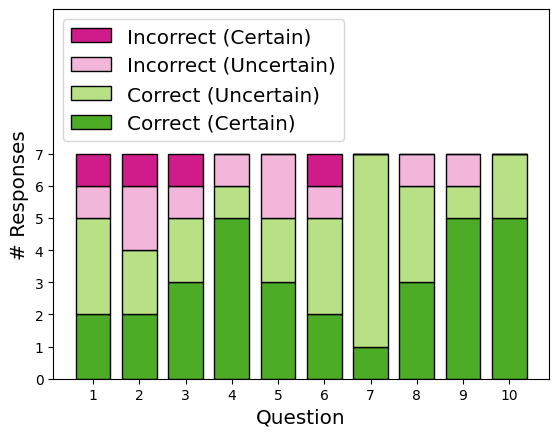

Spearman correlation is 0.019607843137254898, pvalue = 0.9667190902161872


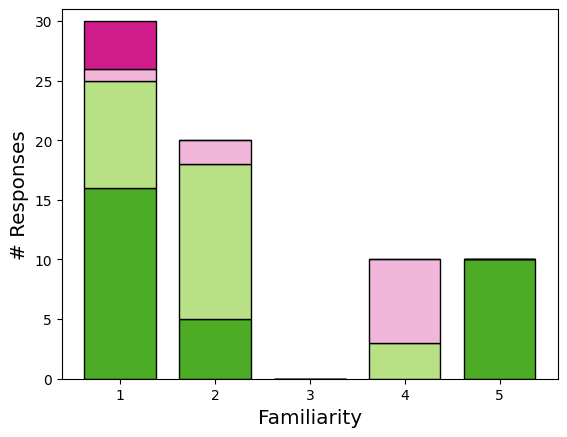

(0.019607843137254898, 0.9667190902161872)

In [12]:
study_ours_no_outliers = Study(studies[0].truth, "251570_ours_no_outliers", [r for i, r in enumerate(studies[0].responses) if i != 0 and i != 4])
study_ours_no_outliers.evaluate()

visualize_accuracy(study_ours_no_outliers, max_count=len(study_ours_no_outliers.responses) + 4, legend="upper left")
visualize_familiarity_accuracy(study_ours_no_outliers)

[[[9, 9, 3, 4, 2], [1, 0, 0, 0, 0]], [[3, 7, 3, 4, 2], [7, 2, 0, 0, 0]], [[0, 1, 1, 3, 2], [10, 8, 2, 1, 0]]]


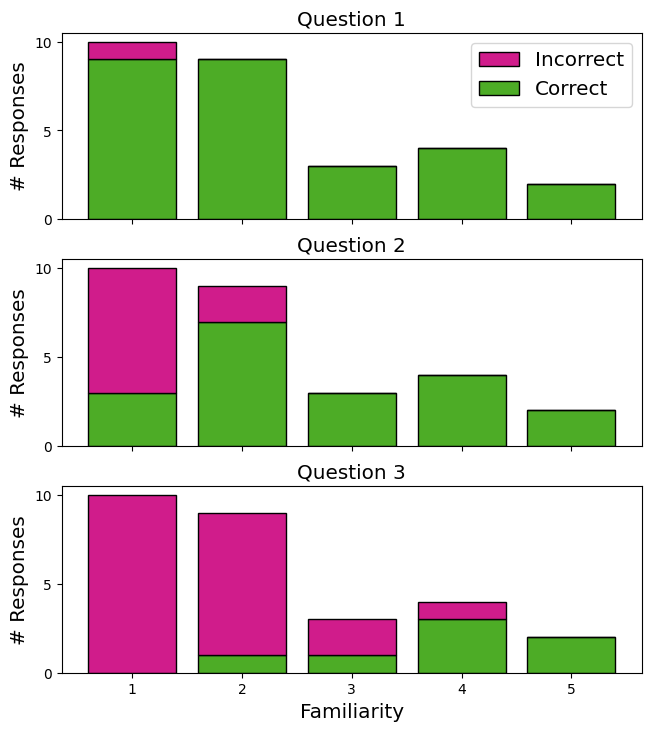

In [13]:
visualize_familiarity_correlation_bar(studies)

Spearman correlation is 0.29673273237950815, pvalue = 0.5181324383003797


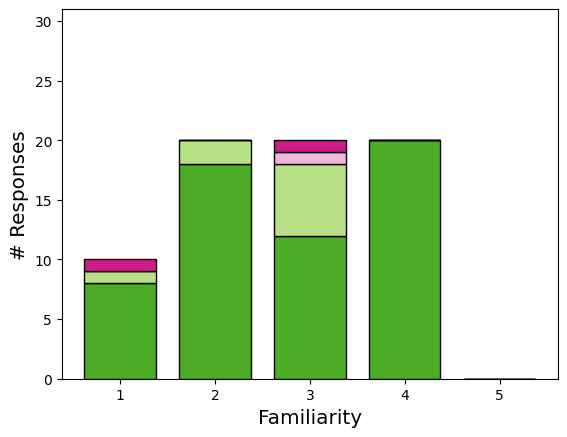

Spearman correlation is -0.1822384219130772, pvalue = 0.6388686797190368


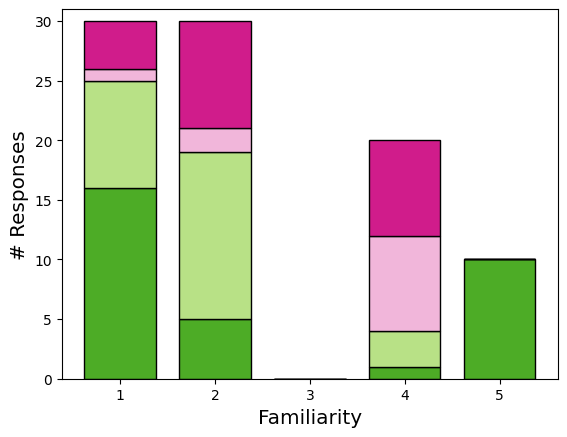

Spearman correlation is 0.5833333333333334, pvalue = 0.22424768518518484


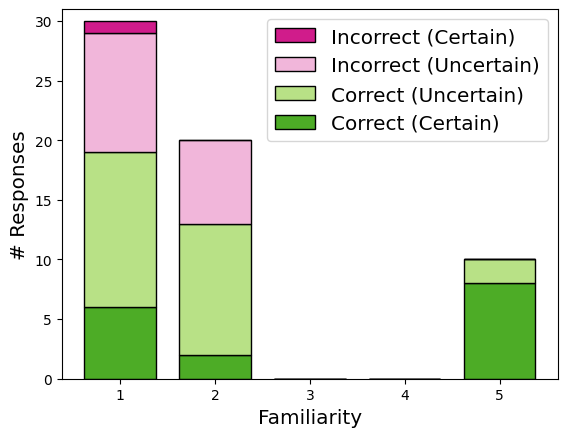

Spearman correlation is -0.2623303343135812, pvalue = 0.6155309186350417


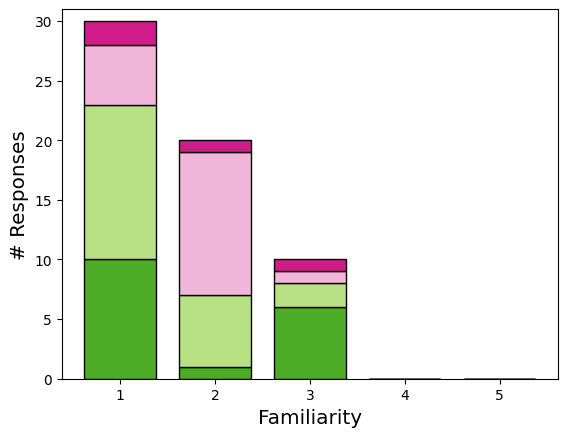

Spearman correlation is 0.2197432441485405, pvalue = 0.261199791967174


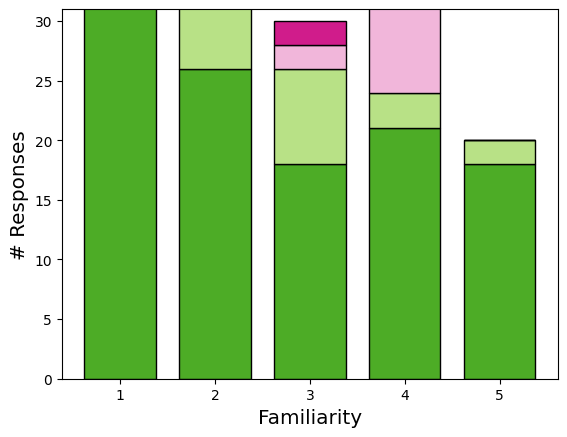

In [14]:
dict = {"param": ["r", "p r"]}
for i in [1, 0, 3, 2]:
    s = studies[i]
    spearman, pvalue = visualize_familiarity_accuracy(s, legend="upper right" if i == 3 else None)
    dict[re.sub(r'_', ' ', s.name)] = [f"{spearman:.2f}", "0.001" if pvalue < 0.001 else f"{pvalue:.3f}"]

all_study = Study(studies[0].truth, "combined_ours", np.array([r for s in studies for r in s.responses]).flatten())
spearman, pvalue = visualize_familiarity_accuracy(all_study)
dict["all"] = [f"{spearman:.2f}", "0.001" if pvalue < 0.001 else f"{pvalue:.3f}"]

pd.DataFrame(dict).set_index("param").T.to_csv(f"../data/studies_spearman.csv", index_label="param")